# Groundwater signatures

*R.A. Collenteur, Eawag, 2023*

In this notebook we introduce the **groundwater signatures** module available in Pastas. The signatures methods can be accessed through the `signatures` module in the `pastas.stats` sub-package.

Groundwater signatures are quantitative metrics that characterize different aspects of a groundwater time series. They are commonly subdivided in different categories: shape, distribution, and structure. Groundwater signatures are also referred to as 'indices' or 'quantitative' metrics. In Pastas, 'signatures' is adopted to avoid any confusion with time indices and goodness-of-fit metrics. For an introduction to the signatures concept in groundwater studies we refer to [Heudorfer and Haaf et al. (2019)](#References).

The signatures can be used to *objectively* characterize different groundwater systems, for example, distinguishing between fast and slow groundwater systems. The use of signatures is common in other parts of hydrology (e.g., rainfall-runoff modeling) and can be applied in all phases of modeling (see, for example, [McMillan, 2021](#References) for an overview). 

<div class="alert alert-warning">
<b>Note:</b>
The `signatures` module is under active development and any help is welcome. Please report any issues and bugs on the Pastas GitHub repository!
</div>

In [1]:
import numpy as np
import pandas as pd
import pastas as ps

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

ps.show_versions()

Python version: 3.11.3
NumPy version: 1.24.4
Pandas version: 2.1.4
SciPy version: 1.12.0
Matplotlib version: None
Numba version: 0.59.0
LMfit version: 1.2.2
Latexify version: Not Installed
Pastas version: 1.5.0b


## 1. Load two time series with different characteristics

To illustrate the use of groundwater signatures we load two time series of hydraulic heads with visually different characteristics.

<Axes: xlabel='Date'>

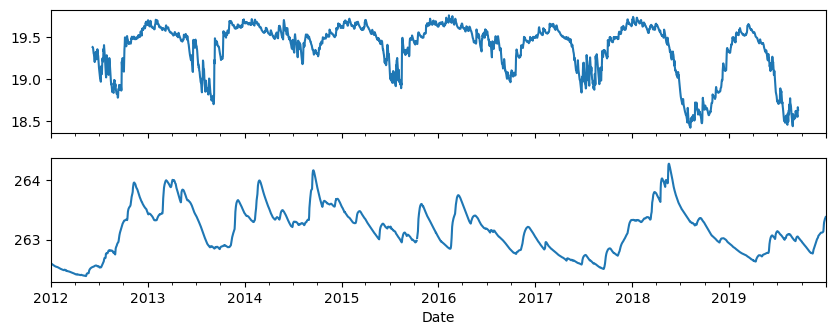

In [2]:
head1 = pd.read_csv(
    "data_notebook_20/head_threshold.csv", index_col=0, parse_dates=True
).squeeze()
head2 = pd.read_csv(
    "data_wagna/head_wagna.csv", index_col=0, parse_dates=True, skiprows=2
).squeeze()
head2 = head2.resample("D").mean().loc["2012":]

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

head1.plot(ax=ax1)
head2.plot(ax=ax2)

## 2. Compute signatures

To compute all available signatures at once, we can use the `stats` method from the `signatures` module. This is shown below. Alternatively, each signature can be computed with a separate method (e.g., `ps.stats.signatures.baseflow_index`).

In [3]:
sigs1 = ps.stats.signatures.summary(head1)
sigs2 = ps.stats.signatures.summary(head2)

# Create a dataframe for easy comparison and plotting
df = pd.concat([sigs1, sigs2], axis=1)
df

  return bound(*args, **kwds)

  return bound(*args, **kwds)



AttributeError: module 'pastas.stats.signatures' has no attribute 'gxg'

## 3. Plot the results

Depending on the signature, different ranges of parameters can be expected. We therefore normalize the signatures values by the mean value of each signature. This way we can easily compare the two groundwater systems.

In [ ]:
_, ax = plt.subplots(1,1, figsize=(10, 4))
df.div(df.mean(axis=1), axis=0).mul(100).plot(ax=ax)
ax.set_xticks(np.arange(len(df.index)), df.index, rotation=90, )
ax.set_ylabel("% Change from the mean\n signature  value")
ax.grid()

## 4. Interpretation of signatures

The different signatures can be used to compare the different systems or characterize a single system. For example, the first head time series has a high bimodality coefficient (>0.7), indicating a bimodal distribution of the data. This makes sense, as this time series is used as an example for the non-linear threshold model (see notebook). Rather than (naively) testing all model structures, this is an example where we can potentially use a groundwater signature to identify a 'best' model structure beforehand.

Another example. The second time series is observed in a much slower groundwater system than the first. This is, for example, clearly visible and quantified by the different values for the 'pulse_duration', the 'recession and recovery constants', and the 'slope of the duration curves'. We could use this type of information to determine whether we should use a 'fast' or 'slow' response function (e.g., an Exponential or Gamma function). These are just some examples of how groundwater signatures can be used to improve groundwater modeling, more research on this topic is required. Please contact us if interested!

A little disclaimer: from the data above, it is actually not that straightforward to compare the signature values because the range in values is large. For example, the rise and fall rate show small differences in absolute values, but their numbers vary by over 200%. Thus, interpretation requires some more work.  

### References

The following references are helpful in learning about the groundwater signatures:

- Heudorfer, B., Haaf, E., Stahl, K., Barthel, R., 2019. [Index-based characterization and quantification of groundwater dynamics.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018WR024418) Water Resources Research.
- Haaf, E., Giese, M., Heudorfer, B., Stahl, K., Barthel, R., 2020. [Physiographic and Climatic Controls on Regional Groundwater Dynamics.](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019WR026545) Water Resources Research.
- Giese, M., Haaf, E., Heudorfer, B., Barthel, R., 2020. [Comparative hydrogeology – reference analysis of groundwater dynamics from neighbouringobservation wells](https://www.tandfonline.com/doi/full/10.1080/02626667.2020.1762888) Hydrological Sciences Journal.
- McMillan, H.K., 2021. [A review of hydrologic signatures and their applications](https://wires.onlinelibrary.wiley.com/doi/10.1002/wat2.1499). WIREs Water.